In [1]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../..')))

In [2]:

from src.pipeline.modules.clip import ClipFast
from src.pipeline.modules.helper.vision import rotation_image_proper
from src.pipeline.modules.cloth_categories import ClothingCategories
from src.pipeline.modules.cloth_matrix import ClothingSimilarity



from config.path import get_training_data_path
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [3]:
clip_instance = ClipFast(model_name='ViT-L/14')

In [4]:
class_name = 'short'
relative_path = get_training_data_path('production', class_name)
fullpath = os.path.join(relative_path, 'frame1730_short_pant_.jpg')

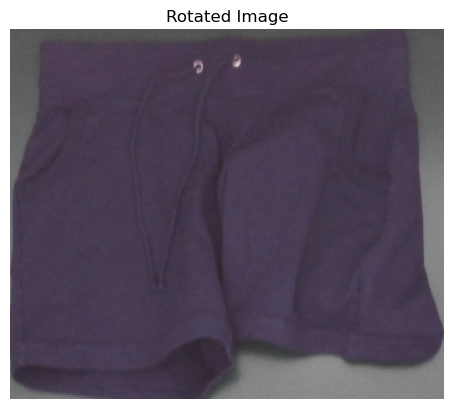

[['pant', 0.267822265625], ['short', 0.71630859375], ['skirt', 0.0158233642578125]]


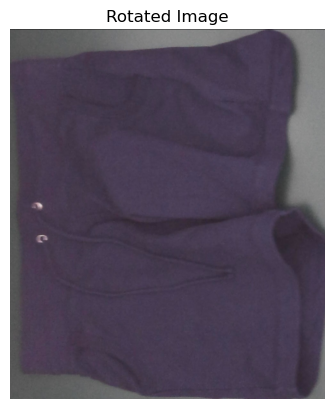

[['pant', 0.60546875], ['short', 0.226318359375], ['skirt', 0.168212890625]]


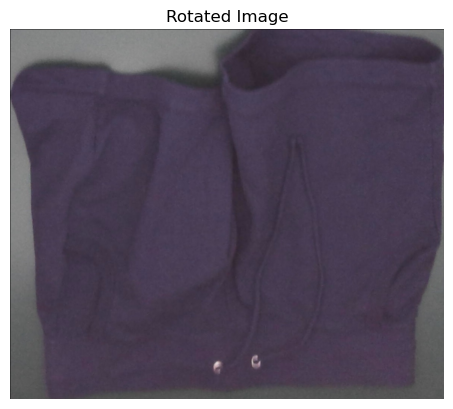

[['pant', 0.650390625], ['short', 0.254638671875], ['skirt', 0.09515380859375]]


In [9]:
image = cv2.imread(fullpath)

rot_accuracy = []
clip_instance.classes = ['pant', 'short', 'skirt']

for i in range(0,3):

    rot_frame_rgb = rotation_image_proper(image, i*90)

    # Display the rotated image using Matplotlib
    plt.imshow(rot_frame_rgb)
    plt.title('Rotated Image')
    plt.axis('off')  # Hide axis
    plt.show()

    clip_instance.image = rot_frame_rgb
    res = clip_instance.process(rot_frame_rgb)
    print(res)

In [6]:
ClothingSimilarity.get_weighted_accuracy(2, clip_instance.classes, res, ClothingSimilarity.high_level_matrix)

[['pant', 0.9915145874023438],
 ['shirt', 0.40660820007324217],
 ['dress', 0.20176925659179687],
 ['jacket', 0.10640525817871094]]